In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from pandas import to_datetime

sns.set_theme()

### UPSAMPLING

In [84]:
df= pd.read_csv("energy_dataset.csv",parse_dates=[0],index_col="time")

In [85]:
df.head()

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
time,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,NaN,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,NaN,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,NaN,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,NaN,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [86]:
df.columns

Index(['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind offshore eday ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual'],
      dtype='object')

In [87]:
df= df.drop(columns=['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind offshore eday ahead', 'forecast wind onshore day ahead',  'price day ahead',
       'price actual'])

In [88]:
df.index= pd.to_datetime(df.index,utc=True)

In [89]:
dfup= df.resample('5min').asfreq()

In [90]:
dfup

,total load forecast,total load actual
time,,
2014-12-31 23:00:00+00:00,26118.0,25385.0
2014-12-31 23:05:00+00:00,NaN,NaN
2014-12-31 23:10:00+00:00,NaN,NaN
2014-12-31 23:15:00+00:00,NaN,NaN
2014-12-31 23:20:00+00:00,NaN,NaN
...,...,...
2018-12-31 21:40:00+00:00,NaN,NaN
2018-12-31 21:45:00+00:00,NaN,NaN
2018-12-31 21:50:00+00:00,NaN,NaN


In [95]:
dfdn1= df.resample('D').mean()
dfdn1.head()

,total load forecast,total load actual
time,,
2014-12-31 00:00:00+00:00,26118.000000,25385.000000
2015-01-01 00:00:00+00:00,24753.250000,23966.958333
2015-01-02 00:00:00+00:00,27519.416667,27188.541667
2015-01-03 00:00:00+00:00,25500.833333,25097.750000
2015-01-04 00:00:00+00:00,27167.875000,27104.916667


In [97]:
dfdn2= df.resample('Q').mean()
dfdn2.head()

,total load forecast,total load actual
time,,
2014-12-31 00:00:00+00:00,26118.000000,25385.000000
2015-03-31 00:00:00+00:00,29366.018981,29293.296919
2015-06-30 00:00:00+00:00,27649.529304,27648.270891
2015-09-30 00:00:00+00:00,28723.413043,28667.034873
2015-12-31 00:00:00+00:00,27893.495924,27843.013152


In [100]:
dfdn3= df.resample('Y').mean()
dfdn3.head()

,total load forecast,total load actual
time,,
2014-12-31 00:00:00+00:00,26118.000000,25385.000000
2015-12-31 00:00:00+00:00,28404.943836,28358.506012
2016-12-31 00:00:00+00:00,28514.941712,28507.837111
2017-12-31 00:00:00+00:00,28860.741096,28856.996917
2018-12-31 00:00:00+00:00,29068.770293,29064.327053


<Axes: xlabel='time'>

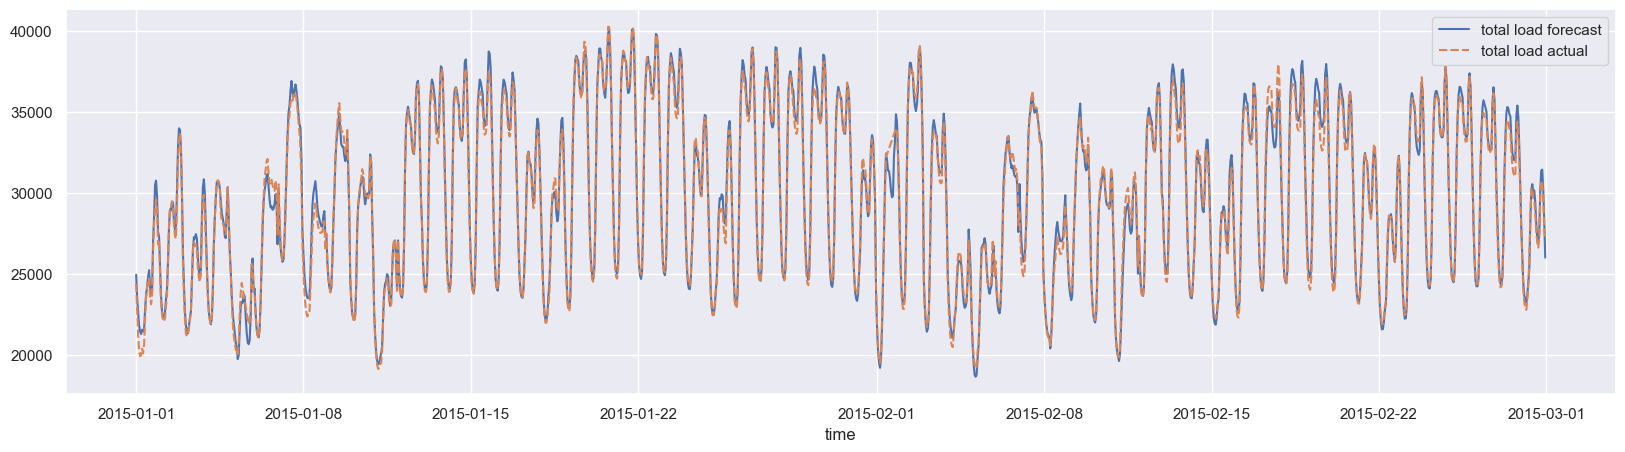

In [102]:
plt.figure(figsize=(20,5))
sns.lineplot(data=df['2015-01':'2015-02'])

<Axes: xlabel='time'>

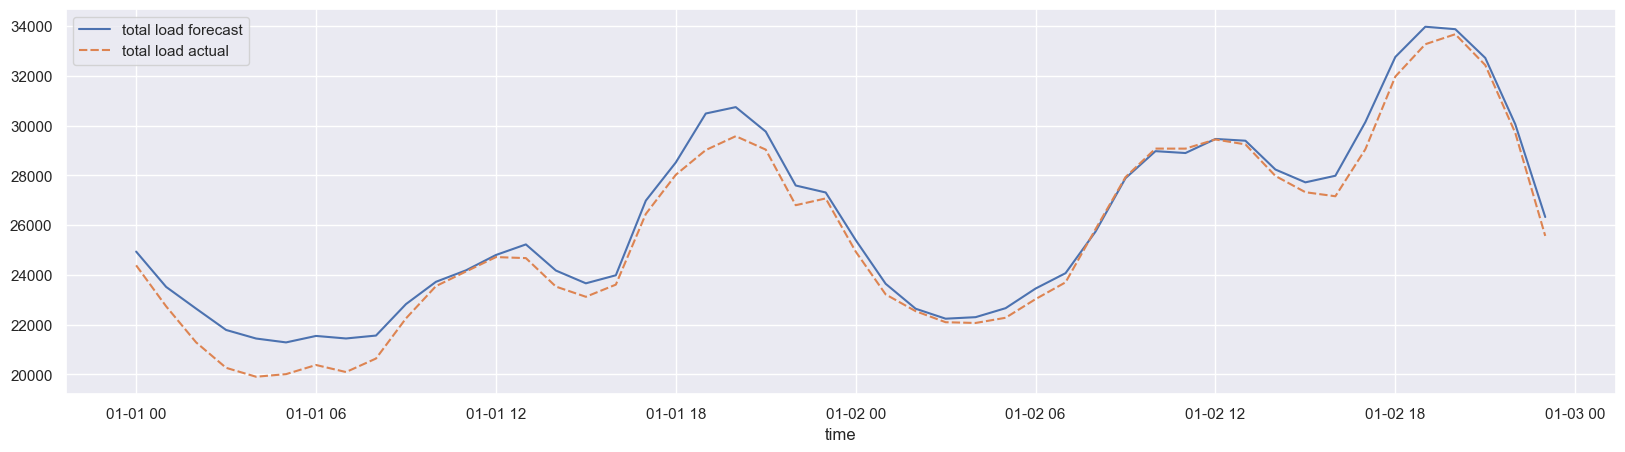

In [104]:
plt.figure(figsize=(20,5))
sns.lineplot(data=df['2015-01-01':"2015-01-02"])

<Axes: xlabel='time'>

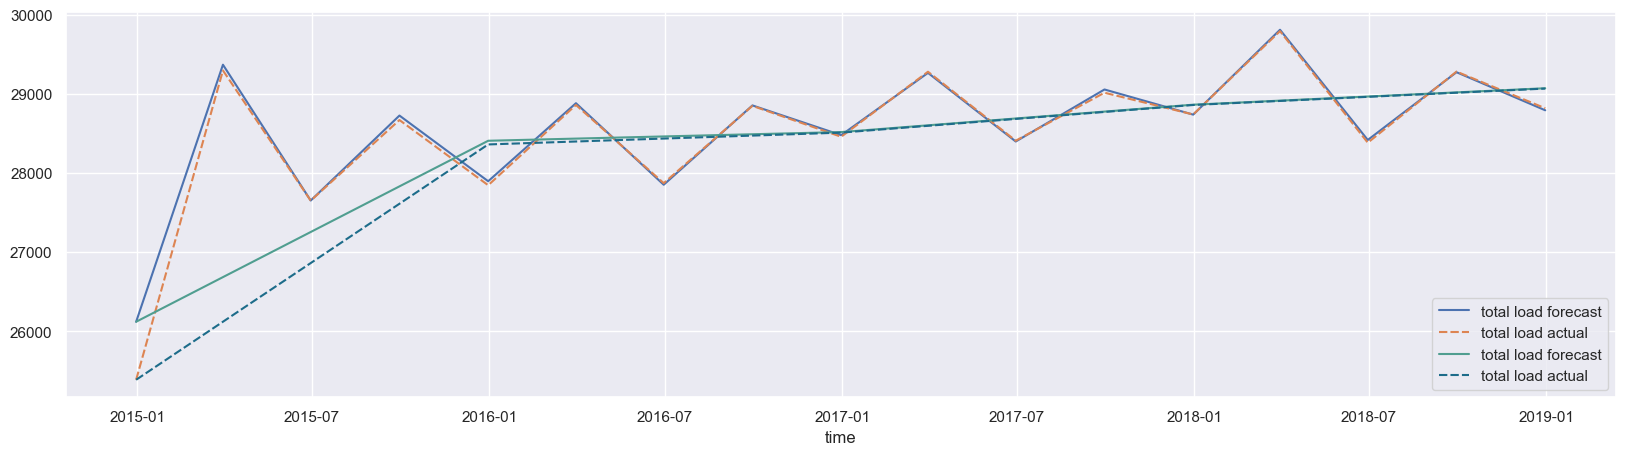

In [108]:
plt.figure(figsize=(20,5))
sns.lineplot(data=dfdn2)
sns.lineplot(data=dfdn3,palette="crest")

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


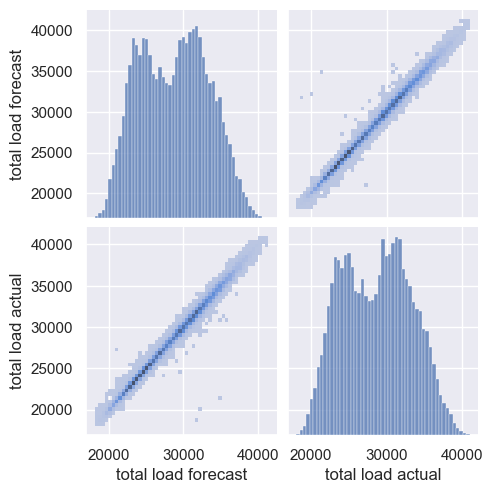

In [117]:
sns.pairplot(data=df,kind="hist")
plt.show()

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


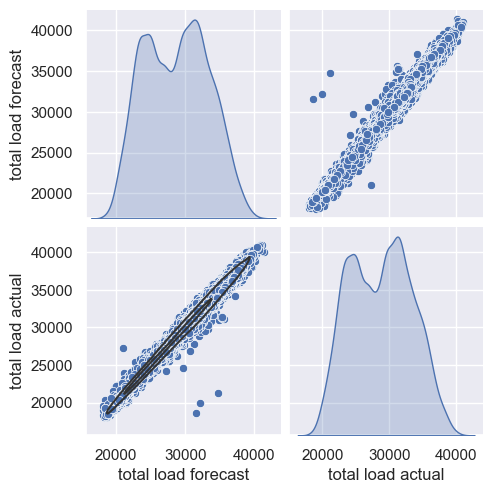

In [120]:
g = sns.pairplot(df, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=3, color=".2")
plt.show()

#### INTERPOLATION

In [121]:
dfint= dfup .interpolate(method="quadratic")

In [122]:
dfint

,total load forecast,total load actual
time,,
2014-12-31 23:00:00+00:00,26118.000000,25385.000000
2014-12-31 23:05:00+00:00,26034.131670,25331.387658
2014-12-31 23:10:00+00:00,25947.572733,25272.326045
2014-12-31 23:15:00+00:00,25858.323189,25207.815161
2014-12-31 23:20:00+00:00,25766.383039,25137.855005
...,...,...
2018-12-31 21:40:00+00:00,24575.044259,24771.657386
2018-12-31 21:45:00+00:00,24519.381093,24680.117170
2018-12-31 21:50:00+00:00,24475.652662,24596.827533


<Axes: xlabel='time'>

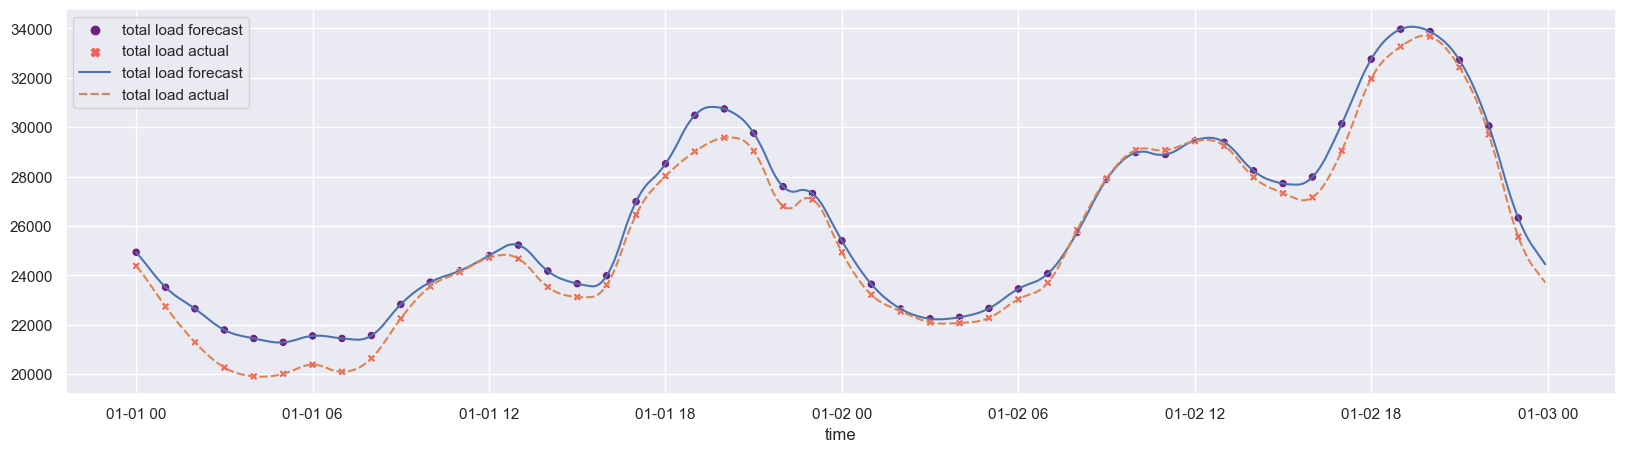

In [137]:
plt.figure(figsize=(20,5))
sns.scatterplot(data=df.loc['2015-01-01':'2015-01-02'],palette="magma")
sns.lineplot(data=dfint.loc['2015-01-01':'2015-01-02'])

<Axes: xlabel='time'>

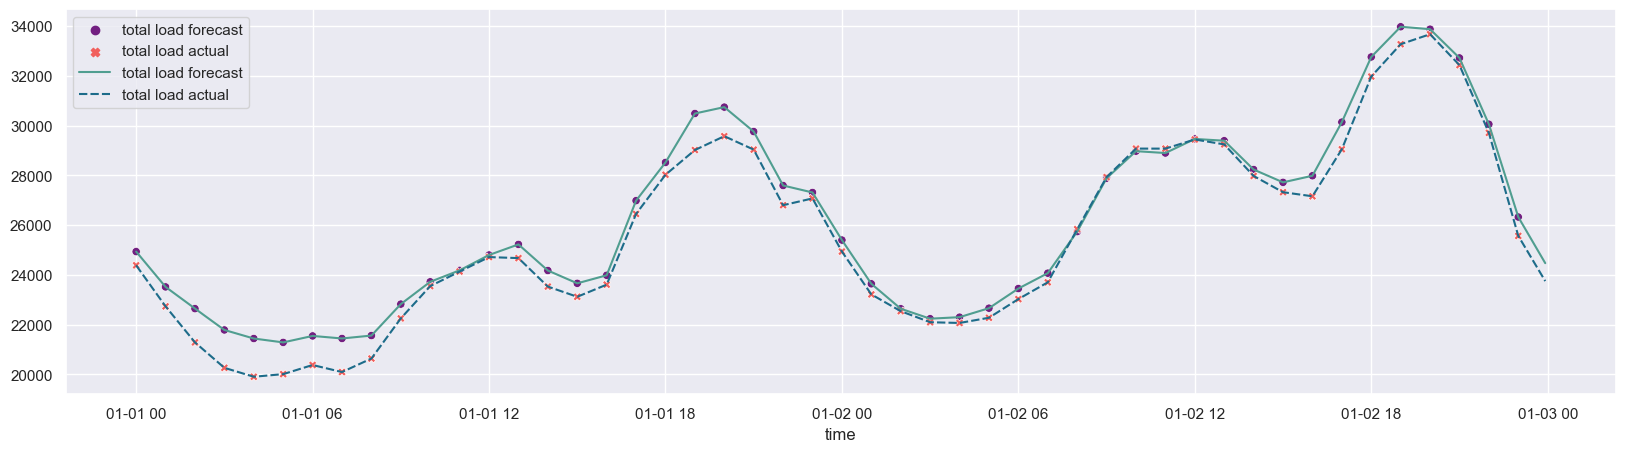

In [141]:
dfint2= dfup.interpolate(method="linear")
plt.figure(figsize=(20,5))
sns.scatterplot(data=df.loc['2015-01-01':'2015-01-02'],palette="magma")
sns.lineplot(data=dfint2.loc['2015-01-01':'2015-01-02'],palette="crest")

<Axes: xlabel='time'>

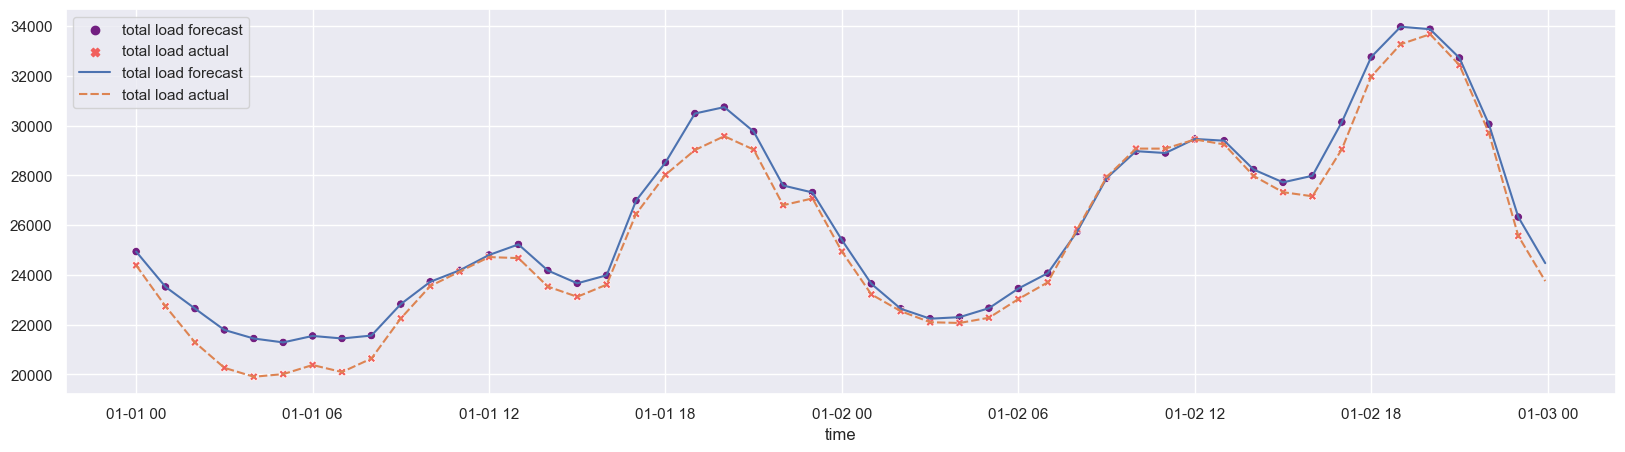

In [148]:
dfint3= dfup.interpolate(method='from_derivatives')
plt.figure(figsize=(20,5))
sns.scatterplot(data=df.loc['2015-01-01':'2015-01-02'],palette="magma")
sns.lineplot(data=dfint2.loc['2015-01-01':'2015-01-02'])

<Axes: >

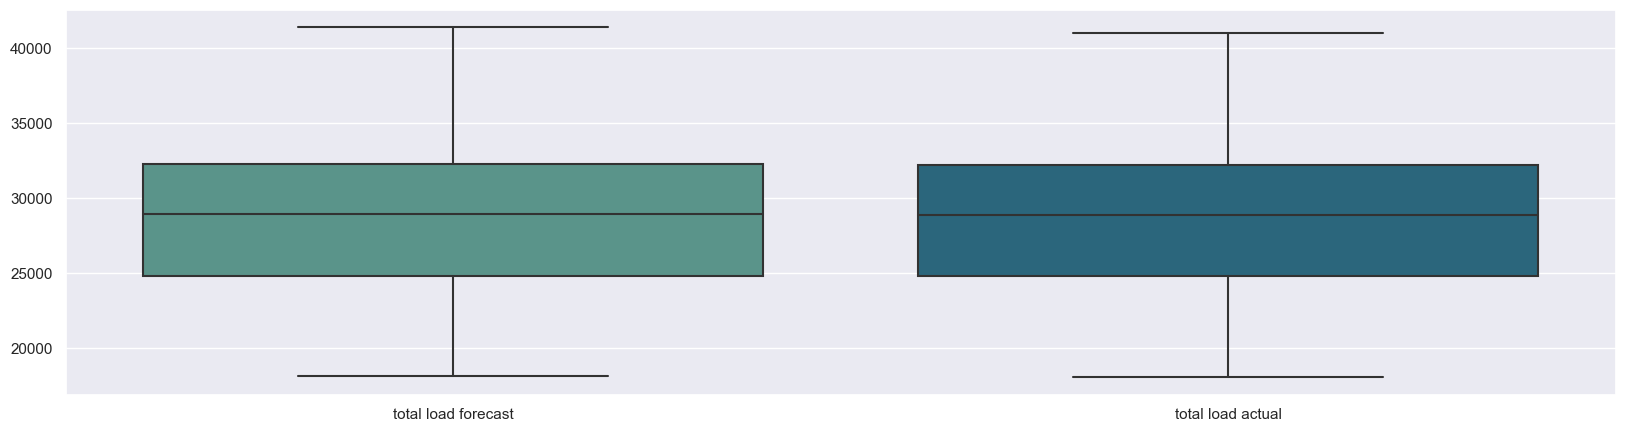

In [153]:
plt.figure(figsize=(20,5))
sns.boxplot(data=df,palette="crest")

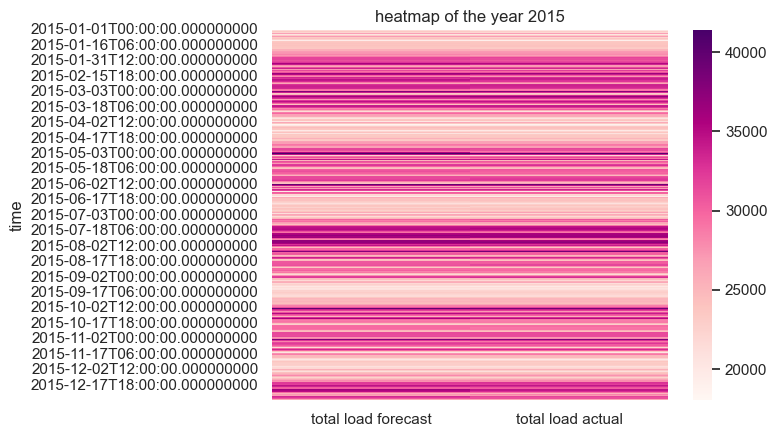

In [154]:
sns.heatmap(data=df.loc["2015-01-01":"2015-12-31"],cmap="RdPu")
plt.title("heatmap of the year 2015")
plt.show()

<Axes: ylabel='Count'>

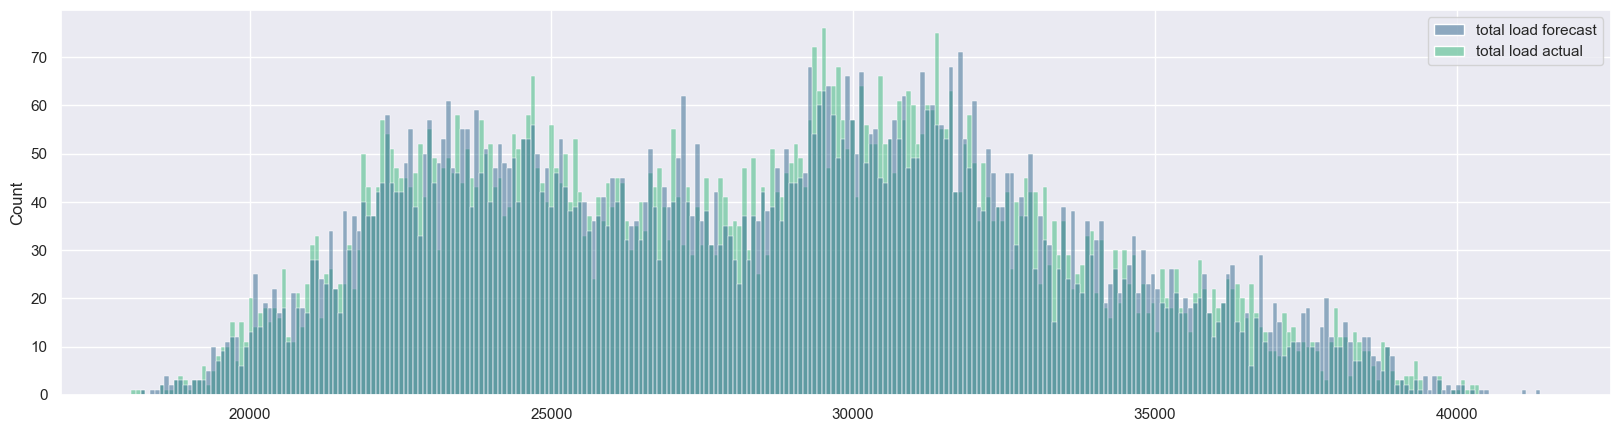

In [160]:
plt.figure(figsize=(20,5))
sns.histplot(data=df.loc["2015-01-01":"2015-12-31"],bins=300,palette="viridis")